In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import GridSearchCV


import SweetSpotPrediction as ssp

# 04 Classification Model
one of the better models from step 03 can here be tuned
*Note: Run 01 to build the .csv files needed*

In [2]:
df = pd.read_csv('ClassificationData.csv')

In [3]:
features = [
    #'XPos', # propbably dont want these as features
    #'YPos', # propbably dont want these as features
    'Thickness',
    'AvgNTG',
    'AvgPerm',
    'AvgPoro',
    'NetPerm',

]

label_cls = 'WellPresent' 

In [4]:
df.dropna(inplace=True)

In [5]:
X_train, X_, y_train, y_ = train_test_split(df[features], df[label_cls], test_size=0.33, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_, y_, test_size=0.50, random_state=42)

In [6]:
preprocessing = StandardScaler()
X_train = preprocessing.fit_transform(X_train)
X_test = preprocessing.transform(X_test)
X_val = preprocessing.transform(X_val)
X_train[:5]

array([[-1.12575556,  0.6153493 , -0.31663338, -1.66260359, -0.82918996],
       [ 0.40753906,  0.25875761, -0.21976436, -0.09182623, -0.33758253],
       [ 1.85501255,  0.31995338, -0.27835758, -0.11918309,  0.12937766],
       [-0.2260377 ,  0.55406095, -0.3504782 ,  0.46813745, -0.41576113],
       [ 1.02251528, -0.07085826,  0.23406518,  0.4761513 ,  4.59688932]])

In [7]:
from sklearn.ensemble import AdaBoostClassifier

DTC = tree.DecisionTreeClassifier(random_state = 11, max_features = "auto", class_weight = "balanced",max_depth = None)
clf = AdaBoostClassifier(base_estimator = DTC)

In [8]:
clf.fit(X_train, y_train)
y_pred_val = clf.predict(X_val)
ssp.ReportMetrics(clf, X_train, X_val, y_train, y_val, y_pred_val)

Weighted accuracy on training set: 1.000
Weighted accuracy on test set: 0.723

Precision: 0.525
Recall: 0.471
F1: 0.496


# Lets optimize hyper parameters

In [9]:
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1, 2 , 4, 8 ,16, 32,64,128,256]
             }


# run grid search
grid_search_clf = GridSearchCV(clf, param_grid=param_grid, scoring = 'roc_auc', cv=5,iid=False)
grid_search_clf.fit(X_train, y_train)
grid_search_clf.best_params_
clf = grid_search_clf.best_estimator_


In [10]:
y_pred_val = clf.predict(X_val)
ssp.ReportMetrics(clf, X_train, X_val, y_train, y_val, y_pred_val)

Weighted accuracy on training set: 1.000
Weighted accuracy on test set: 0.746

Precision: 0.504
Recall: 0.522
F1: 0.513


# Original

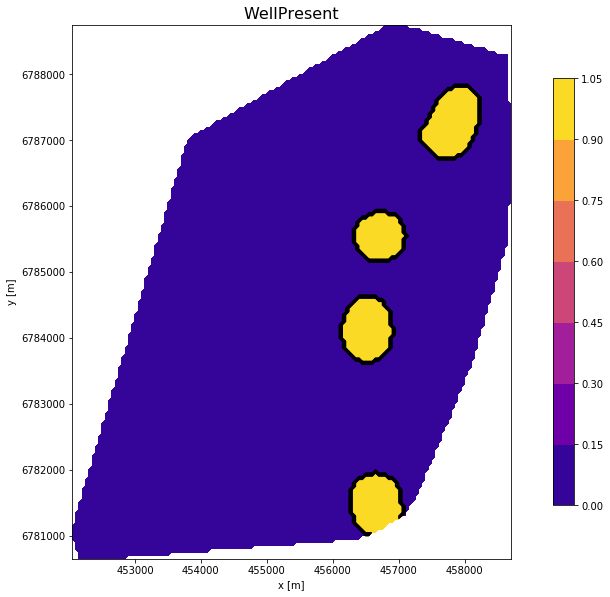

In [12]:
ssp.plot_map(df, label_cls)

# Prediction

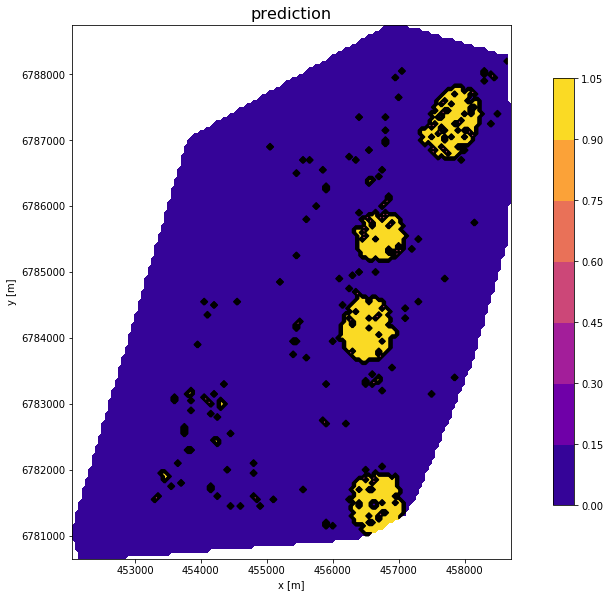

In [13]:
df['prediction'] = clf.predict(preprocessing.transform(df[features]))
ssp.plot_map(df, 'prediction')

# lets draw how certain the clasifications are

In [ ]:
df['prediction_probability'] = clf.predict_proba(df[features])[:,1] # with 1 beeing the probability that there is a sweetspot
ssp.plot_map(df, 'prediction_probability')

# <a href="03 Exploration of models.ipynb">Previous</a> Notebook